In [1324]:
import sys
# !{sys.executable} -m pip install pyvis
# !{sys.executable} -m pip install datashader
# !{sys.executable} -m pip install lmfit
# !{sys.executable} -m pip install pycario
!pip install sklearn== 0.24.0


Processing c:\users\kgulp\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897\sklearn-0.0-py2.py3-none-any.whl


ERROR: Could not find a version that satisfies the requirement 0.24.0 (from versions: none)
ERROR: No matching distribution found for 0.24.0


In [2]:
!pip uninstall igraph -y
!pip uninstall python-igraph -y
!pip install python-igraph==0.9.6
!pip install cairocffi

Found existing installation: python-igraph 0.9.6
Uninstalling python-igraph-0.9.6:
  Successfully uninstalled python-igraph-0.9.6
  Using cached python_igraph-0.9.6-cp38-cp38-win_amd64.whl (2.4 MB)


In [203]:
df_edges = pd.read_csv(f'../Data/tab_werkschool.csv')
df_nodes = pd.read_csv('../Data/tab_n(with oplniv).csv')

In [350]:
print(sorted(df_nodes['lft'].unique()))

# for i in ['Surinaams', 'Turks', 'Marokkaans', 'Autochtoon', 'Overig']:
# #     print(df_nodes[df_nodes['etngrp'] == i]['n'].sum())
#     x = df_edges[df_edges['geslacht_src'] == 'Man']
#     print(x[x['geslacht_dst'] == 'Vrouw']['n'].sum()/x['n'].sum())
#     print(x[x['geslacht_dst'] == 'Man']['n'].sum()/x['n'].sum())
    
#     print('\n')
#     x = df_edges[df_edges['geslacht_src'] == 'Vrouw']
#     print(x[x['geslacht_dst'] == 'Vrouw']['n'].sum()/x['n'].sum())
#     print(x[x['geslacht_dst'] == 'Man']['n'].sum()/x['n'].sum())
    
#     print('\n')

#     break

# print(df_nodes[df_nodes['geslacht'] == 'Vrouw']['n'].sum())
# print(df_nodes[df_nodes['geslacht'] == 'Man']['n'].sum())

['[0,20)', '[20,30)', '[30,40)', '[40,50)', '[50,60)', '[60,70)', '[70,80)', '[80,120]']


In [205]:
for i in ['Surinaams', 'Turks', 'Marokkaans', 'Autochtoon', 'Overig']:
#     print(df_nodes[df_nodes['etngrp'] == i]['n'].sum())
    print(df_edges[df_edges['etngrp_src'] == i]['n'].sum()/(df_nodes[df_nodes['etngrp'] == i]['n'].sum()))
    


37.45788001243395
30.559311616472034
34.4293971062142
34.3906404565631
33.39749639858924


In [190]:
plt.rcParams["font.family"] = "serif"
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

import pandas as pd
import numpy as np
import math
import scipy
from scipy.spatial import distance, distance_matrix
from scipy.spatial.distance import squareform 
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from scipy.optimize import root
from numpy import cosh, zeros_like, mgrid, zeros

import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d    
import itertools
from itertools import groupby
import pandas as pd
import numpy as np
import scipy
from scipy.spatial import distance, distance_matrix
from scipy import optimize
from scipy.special import lambertw
from igraph import Graph

import igraph as ig

import RegscorePy

import matplotlib as mpl
import matplotlib.font_manager as fm#  Collect all the font names available to matplotlib
font_names = [f.name for f in fm.fontManager.ttflist]

print(font_names)


['cmmi10', 'STIXNonUnicode', 'DejaVu Sans Display', 'cmsy10', 'STIXSizeTwoSym', 'cmr10', 'DejaVu Sans Mono', 'STIXGeneral', 'STIXSizeOneSym', 'DejaVu Serif Display', 'STIXGeneral', 'DejaVu Sans', 'STIXSizeThreeSym', 'cmb10', 'DejaVu Sans', 'DejaVu Sans Mono', 'DejaVu Sans', 'STIXSizeOneSym', 'STIXSizeThreeSym', 'cmtt10', 'STIXGeneral', 'STIXSizeFourSym', 'STIXSizeFiveSym', 'STIXGeneral', 'DejaVu Sans', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'DejaVu Serif', 'STIXNonUnicode', 'STIXSizeFourSym', 'DejaVu Serif', 'DejaVu Serif', 'cmss10', 'DejaVu Serif', 'STIXNonUnicode', 'cmex10', 'STIXSizeTwoSym', 'STIXNonUnicode', 'Broadway', 'Microsoft Tai Le', 'Franklin Gothic Demi Cond', 'Cambria', 'Verdana', 'Bell MT', 'Bernard MT Condensed', 'Bodoni MT', 'Times New Roman', 'Forte', 'Segoe Script', 'MS Outlook', 'Algerian', 'Perpetua', 'Century Schoolbook', 'MT Extra', 'Symbol', 'Palace Script MT', 'Tw Cen MT', 'Century Gothic', 'Tw Cen MT Condensed', 'Cambria', 'Britannic Bold', 'Calisto MT', 'Leel

In [4]:
def hash_groups():
    '''
    Making a hash dictionary based on the groups
    Making the hash and rehash dictionaries
    '''

    # Initializing hash dictionaries
    hash_dict = {}
    rehash_dict = {}

    # Read oplniv dataframe
    df = pd.read_csv('../Data/tab_n_(with oplniv).csv')
    
    # Hash every group
    for i in range(df.shape[0]):
        group = df.iloc[i]
                
        age = group['lft']
        etnc = group['etngrp']
        gender = group['geslacht']
        education = group['oplniv']


        hash_dict[f'{age}, {etnc}, {gender}, {education}'] = i
        rehash_dict[i] = f'{age}, {etnc}, {gender}, {education}' 
    
    return hash_dict, rehash_dict

hash_dict, rehash_dict = hash_groups()

52
[[1 1 1 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
10958
57600


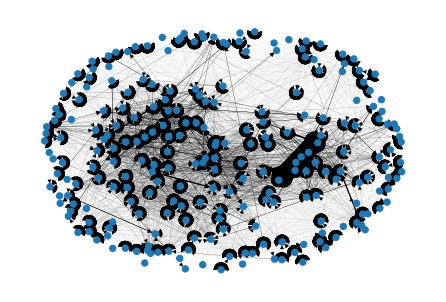

In [5]:
import networkx.algorithms.community as nx_comm

def reject_outliers(data, m = 2.):
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    s = d/mdev if mdev else 0.
    return data[s<m]



print(hash_dict['[0,20), Overig, Vrouw, 2'])
layer = 'familie'
df = pd.read_csv(f'../Data/probabilities/adjacancy_matrix_{layer}.csv')

A = df.to_numpy()



A = A[:,1:]

stats_list =reject_outliers(A.flatten())

maxi = np.max(stats_list)/2
mean = np.mean(stats_list)
median = np.median(stats_list)

# A.shape



A2 = [i for i in A.flatten() if i> 0]

A1 = A > 0
A1 = A1.astype(int)


g = Graph.Adjacency(A1)

print(A1)
print(g.ecount())
print(len(A.flatten()))



g.transitivity_undirected()
g.modularity(g.clusters(), weights = A2)


t = [i if i > 0 else 0 for i in np.array(g.transitivity_local_undirected(weights = A2)) ] 

np.mean(t)

g.transitivity_undirected()

# A2 = np.matmul(A,A)

# np.trace(A2)/(240**2)

# # mean

G = nx.from_numpy_matrix(A, create_using=nx.DiGraph)

# mod = nx_comm.modularity(G, nx_comm.label_propagation_communities(G))

# trans = nx.transitivity(G)


# (mod,trans)

# pos = nx.kamada_kawai_layout(G)
# nx.draw(G)  # Draw the original graph

edges = G.edges()
# colors = [G[u][v]['colorfor u,v in edges]
weights = [G[u][v]['weight'] *300for u,v in edges]
# 

labeldict = {}

for i in range(240):
    labeldict[i] = rehash_dict[i]

# print(weights)
nx.draw(G, pos=nx.spring_layout(G), width=weights, node_size = [40 for i in range(240)],with_labels = False, labels=labeldict)

plt.show()
# nx.draw(G)

In [544]:
df = pd.read_csv('../Data/tab_n_(with oplniv).csv')
    
for i in df.iterrows():
    
    if i[1]['etngrp'] == 'Overig':
        age = i[1]['lft']
        gender=i[1]['geslacht']
        education = i[1]['oplniv']
        
#         print(f'{age}, Overig, {gender}, {education}')
        print(hash_dict[f'{age}, Overig, {gender}, {education}'])

0
1
2
18
19
20
33
34
35
36
37
38
42
43
44
45
46
47
51
52
53
57
58
59
63
64
65
66
67
68
99
100
101
105
106
107
108
109
110
132
133
134
144
145
146
180
181
182


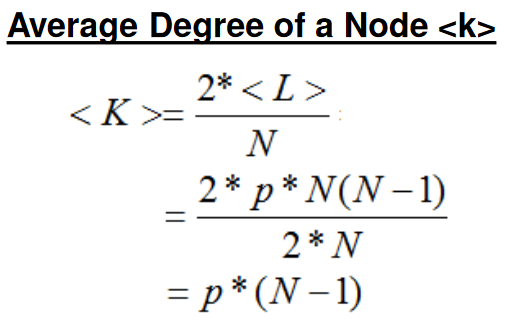


# Original 

## $p = \frac{<K>}{N -1 }$

# Model
## $p = \frac{<K_{ij}>}{N_j}$

In [752]:



def get_pij(df_edges, df_nodes, group):
    
    # probability group= total_connections of group/connections with other group
    # probability node = (total_connections of group / total amount of persons in that group)/ 
    # (connections with other group/total amount of persons in that group)

    # E|k| = average degree between groups or network? I think between groups
    # We do no know alpha and b

    # f(b) = E|k|  - 1/N * ssummation of all probabilities with p(alpha, b)
    # because all probabilities are the same between the groups we can just say
    # f(b) = E|k| - 1/(N+M)/2 * N*M * prob(alpha, b)
    # This is between a group but for full network it will be different

    # Simulate small proportion for the whole network
    # Calculate it for each node instead of group

            #group1     group2      group3
    
    #group1  d=y        d=y         d=y
    #group2  ..         ..          ...
    #group3  ...        ..          ..


        #group1     group2      group3
    
    #group1  p=y        p=y         p=y
    #group2  ..         ..          ...
    #group3  ...        ..          ..


    # geslacht_src,lft_src,oplniv_src,etngrp_src,geslacht_dst,lft_dst,oplniv_dst,etngrp_dst
    
    df_edges['source_group'] = df_edges['geslacht_src'] + "_" +  df_edges['lft_src'] + '_' + df_edges['etngrp_src']  + '_' +df_edges['oplniv_src'].astype(str)
    df_edges['destination_group'] = df_edges['geslacht_dst'] + "_" +  df_edges['lft_dst'] + '_' + df_edges['etngrp_dst']  + '_' +df_edges['oplniv_dst'].astype(str)
    
    df_edges = df_edges.sort_values(by= ['source_group', 'destination_group'])
    new_df2 = pd.DataFrame()

    new_df = df_edges[['source_group', 'destination_group', 'n']].sort_values(by=['source_group'])

    new_df2[['geslacht_src','lft_src','oplniv_src','etngrp_src','geslacht_dst','lft_dst','oplniv_dst','etngrp_dst']] = df_edges[['geslacht_src','lft_src','oplniv_src','etngrp_src','geslacht_dst','lft_dst','oplniv_dst','etngrp_dst']].apply(lambda x: pd.factorize(x)[0]+1)


    source_group_df = new_df.groupby('source_group').sum().reset_index().sort_values(by=['source_group'])
    destination_group_df = new_df.groupby('destination_group').sum().reset_index().sort_values(by=['destination_group'])
    

    probabilities = []
    distances = []
    coordinates = []
    
    
    
    
#     df_nodes = df_nodes[df_nodes['etngrp'] == 'Turks']
    df_nodes['group'] = df_nodes['geslacht'] + "_" +  df_nodes['lft'] + '_' + df_nodes['etngrp']  + '_' +df_nodes['oplniv'].astype(str)
    df_nodes = df_nodes.sort_values(by=['group'])
    new_df = pd.DataFrame()
    new_df[['geslacht','lft','oplniv','etngrp']] = df_nodes[['geslacht','lft','oplniv','etngrp']].apply(lambda x: pd.factorize(x)[0])
   

    print(new_df)
    
    print(df_nodes)
    print(df_nodes, new_df)
    
    s = (240,240)
    
    distances = np.zeros(s)
    probabilities = np.zeros(s)
    
    probab = {}
    distance = {}
    focused_group = []
    c = 0
    for i, j in zip(new_df.iterrows(), df_nodes.iterrows()):
        
        row = i[1]
        row2 = j[1]
        
        # Get coordinates of group based on gender, age and ecucation
        distance[c] = [[row['geslacht']],[ row['lft']], [row['oplniv']]]
        
        # Get last coordinate based on ethnicity 
        # (which is itself a 5 dimensional coordinates because of the 5 dimensions)
        z = np.zeros(5)
        z[row['etngrp']] = 1
        
        distance[c].extend([z])
        
        # Adding group to probab dictionary
        probab[c] = row2['group']
        
        if row2['oplniv'] == group:
            focused_group.append(c)
        


        c+=1
        
    print(c)
    print(len(focused_group))
    # Get dictionary with the amount of nodes and the corresponding amount of connections
    # This is done for each group
    character_dict = {}
    for i in range(240):
        n_s_nodes = df_nodes[df_nodes['group'] == probab[i]]['n']
        
        n_edges =  sum(df_edges[df_edges['source_group'] == probab[i]]['n'])
        
        character_dict[i] = (int(n_s_nodes),int(n_edges))
        
#         

    etn_dist = []
    age_dist = []
    opl_dist = []
    gender_dist = []
    probabilities = []
    
    # Loop through all the 240 * 240 group combination
    for i in focused_group:
        print(i)
        for j in range(240):
            
            # a and b reprecent a list of the coordiantes of two groups
            a = np.array(list(itertools.chain(*distance[i])))
            b = np.array(list(itertools.chain(*distance[j])))
            
            # Get euclidean distance  
            distance_ = np.linalg.norm(a-b)
            
            # Get chracteristic specific distances
            gender_dist_v = (np.linalg.norm(np.array(distance[i][0])- np.array(distance[j][0])))
            age_dist_v = (np.linalg.norm(np.array(distance[i][1])- np.array(distance[j][1])))
            opl_dist_v = (np.linalg.norm(np.array(distance[i][2])- np.array(distance[j][2])))
            etn_dist_v = (np.linalg.norm(np.array(distance[i][3])- np.array(distance[j][3])))
             
            # Normalize the distance such that the euclidean distance can be calculated by each characteristic
            normalized_distance = distance_ / (gender_dist_v + age_dist_v + opl_dist_v + etn_dist_v)
            
            # Add all the distances to their list
#             gender_dist.append(gender_dist_v * normalized_distance)
#             age_dist.append(age_dist_v * normalized_distance)
#             opl_dist.append(opl_dist_v * normalized_distance)
#             etn_dist.append(etn_dist_v * normalized_distance)
            
            
            gender_dist.append(gender_dist_v)
            age_dist.append(age_dist_v )
            opl_dist.append(opl_dist_v )
            etn_dist.append(etn_dist_v )
            
            # Find the total connections between the two groups
            connections = df_edges[(df_edges['source_group'] == probab[i]) & (df_edges['destination_group'] == probab[j])]['n']
            
            # get the total amount of people inside the group
            n_s_nodes = character_dict[i][0]
            
            # Get the total amount of edges a group has
            tot_d_edges = character_dict[j][0]
            
            # Get the average amount of connections by dividing the amount of connections by the receiving group size
            mean_connections = connections/n_s_nodes
            
            
            # If there are no connections between two groups use a 0
            if len(connections) == 0:
                probabilities.append(0)
                continue
        
            # Add the probability that two groups have a connection
            probabilities.append(float(mean_connections/tot_d_edges))
            
#             print(len(gender_dist), len(probabilities))
            
    
    
    return etn_dist, age_dist, opl_dist, gender_dist, probabilities

df_nodes = pd.read_csv('../Data/tab_n(with oplniv).csv')

#

'''
Initialize edges for multiple layers
'''
pijs2 = []
dijs2 = []
layers = ['werkschool', 'buren', 'huishouden', 'familie']


df = pd.DataFrame()

groups = [1,2,3]



for group in groups:
    for layer in layers:
        df_edges = pd.read_csv(f'../Data/tab_{layer}.csv')
        
      
        df_edges = df_edges[(df_edges['lft_src'] != '[0,20)') & (df_edges['lft_dst'] != '[0,20)')]
#         df_nodes = df_nodes[df_nodes['lft'] != '[0,20)']
        
#         df_edges = 
                 
        print('hallo')
        etn_dist, age_dist, opl_dist, gender_dist, probabilities = get_pij(df_edges, df_nodes, group)

        df[layer+'_age_d'] = age_dist
        df[layer+'_gender_d'] = gender_dist
        df[layer+'_opl_d'] = opl_dist
        df[layer+'_etn_d'] = etn_dist


        print(len(probabilities), len(age_dist))
        
        df[layer+'_pij'] = probabilities
        
    
    df.to_csv(f'../Data/probabilities/pij_dij_Distances_education_{group}_m.csv')
    

hallo
     geslacht  lft  oplniv  etngrp
6           0    0       0       0
7           0    0       1       0
8           0    0       2       0
39          0    0       0       1
40          0    0       1       1
..        ...  ...     ...     ...
235         1    7       1       3
236         1    7       2       3
225         1    7       0       4
226         1    7       1       4
227         1    7       2       4

[240 rows x 4 columns]
     Unnamed: 0  Unnamed: 0.1 geslacht       lft      etngrp  oplniv      n  \
6             6             6      Man    [0,20)  Autochtoon       1  30829   
7             7             7      Man    [0,20)  Autochtoon       2   1863   
8             8             8      Man    [0,20)  Autochtoon       3     15   
39           39            39      Man    [0,20)  Marokkaans       1  12208   
40           40            40      Man    [0,20)  Marokkaans       2    596   
..          ...           ...      ...       ...         ...     ...    ... 

<ipython-input-752-cb9c19ad8413>:141: RuntimeWarning: invalid value encountered in double_scalars
  normalized_distance = distance_ / (gender_dist_v + age_dist_v + opl_dist_v + etn_dist_v)


3
6
9
12
15
18
21
24
27
30
33
36
39
42
45
48
51
54
57
60
63
66
69
72
75
78
81
84
87
90
93
96
99
102
105
108
111
114
117
120
123
126
129
132
135
138
141
144
147
150
153
156
159
162
165
168
171
174
177
180
183
186
189
192
195
198
201
204
207
210
213
216
219
222
225
228
231
234
237
19200 19200
hallo
     geslacht  lft  oplniv  etngrp
6           0    0       0       0
7           0    0       1       0
8           0    0       2       0
39          0    0       0       1
40          0    0       1       1
..        ...  ...     ...     ...
235         1    7       1       3
236         1    7       2       3
225         1    7       0       4
226         1    7       1       4
227         1    7       2       4

[240 rows x 4 columns]
     Unnamed: 0  Unnamed: 0.1 geslacht       lft      etngrp  oplniv      n  \
6             6             6      Man    [0,20)  Autochtoon       1  30829   
7             7             7      Man    [0,20)  Autochtoon       2   1863   
8             8      

<ipython-input-752-cb9c19ad8413>:141: RuntimeWarning: invalid value encountered in double_scalars
  normalized_distance = distance_ / (gender_dist_v + age_dist_v + opl_dist_v + etn_dist_v)


3
6
9
12
15
18
21
24
27
30
33
36
39
42
45
48
51
54
57
60
63
66
69
72
75
78
81
84
87
90
93
96
99
102
105
108
111
114
117
120
123
126
129
132
135
138
141
144
147
150
153
156
159
162
165
168
171
174
177
180
183
186
189
192
195
198
201
204
207
210
213
216
219
222
225
228
231
234
237
19200 19200
hallo
     geslacht  lft  oplniv  etngrp
6           0    0       0       0
7           0    0       1       0
8           0    0       2       0
39          0    0       0       1
40          0    0       1       1
..        ...  ...     ...     ...
235         1    7       1       3
236         1    7       2       3
225         1    7       0       4
226         1    7       1       4
227         1    7       2       4

[240 rows x 4 columns]
     Unnamed: 0  Unnamed: 0.1 geslacht       lft      etngrp  oplniv      n  \
6             6             6      Man    [0,20)  Autochtoon       1  30829   
7             7             7      Man    [0,20)  Autochtoon       2   1863   
8             8      

<ipython-input-752-cb9c19ad8413>:141: RuntimeWarning: invalid value encountered in double_scalars
  normalized_distance = distance_ / (gender_dist_v + age_dist_v + opl_dist_v + etn_dist_v)


3
6
9
12
15
18
21
24
27
30
33
36
39
42
45
48
51
54
57
60
63
66
69
72
75
78
81
84
87
90
93
96
99
102
105
108
111
114
117
120
123
126
129
132
135
138
141
144
147
150
153
156
159
162
165
168
171
174
177
180
183
186
189
192
195
198
201
204
207
210
213
216
219
222
225
228
231
234
237
19200 19200
hallo
     geslacht  lft  oplniv  etngrp
6           0    0       0       0
7           0    0       1       0
8           0    0       2       0
39          0    0       0       1
40          0    0       1       1
..        ...  ...     ...     ...
235         1    7       1       3
236         1    7       2       3
225         1    7       0       4
226         1    7       1       4
227         1    7       2       4

[240 rows x 4 columns]
     Unnamed: 0  Unnamed: 0.1 geslacht       lft      etngrp  oplniv      n  \
6             6             6      Man    [0,20)  Autochtoon       1  30829   
7             7             7      Man    [0,20)  Autochtoon       2   1863   
8             8      

<ipython-input-752-cb9c19ad8413>:141: RuntimeWarning: invalid value encountered in double_scalars
  normalized_distance = distance_ / (gender_dist_v + age_dist_v + opl_dist_v + etn_dist_v)


3
6
9
12
15
18
21
24
27
30
33
36
39
42
45
48
51
54
57
60
63
66
69
72
75
78
81
84
87
90
93
96
99
102
105
108
111
114
117
120
123
126
129
132
135
138
141
144
147
150
153
156
159
162
165
168
171
174
177
180
183
186
189
192
195
198
201
204
207
210
213
216
219
222
225
228
231
234
237
19200 19200
hallo
     geslacht  lft  oplniv  etngrp
6           0    0       0       0
7           0    0       1       0
8           0    0       2       0
39          0    0       0       1
40          0    0       1       1
..        ...  ...     ...     ...
235         1    7       1       3
236         1    7       2       3
225         1    7       0       4
226         1    7       1       4
227         1    7       2       4

[240 rows x 4 columns]
     Unnamed: 0  Unnamed: 0.1 geslacht       lft      etngrp  oplniv      n  \
6             6             6      Man    [0,20)  Autochtoon       1  30829   
7             7             7      Man    [0,20)  Autochtoon       2   1863   
8             8      

<ipython-input-752-cb9c19ad8413>:141: RuntimeWarning: invalid value encountered in double_scalars
  normalized_distance = distance_ / (gender_dist_v + age_dist_v + opl_dist_v + etn_dist_v)


4
7
10
13
16
19
22
25
28
31
34
37
40
43
46
49
52
55
58
61
64
67
70
73
76
79
82
85
88
91
94
97
100
103
106
109
112
115
118
121
124
127
130
133
136
139
142
145
148
151
154
157
160
163
166
169
172
175
178
181
184
187
190
193
196
199
202
205
208
211
214
217
220
223
226
229
232
235
238
19200 19200
hallo
     geslacht  lft  oplniv  etngrp
6           0    0       0       0
7           0    0       1       0
8           0    0       2       0
39          0    0       0       1
40          0    0       1       1
..        ...  ...     ...     ...
235         1    7       1       3
236         1    7       2       3
225         1    7       0       4
226         1    7       1       4
227         1    7       2       4

[240 rows x 4 columns]
     Unnamed: 0  Unnamed: 0.1 geslacht       lft      etngrp  oplniv      n  \
6             6             6      Man    [0,20)  Autochtoon       1  30829   
7             7             7      Man    [0,20)  Autochtoon       2   1863   
8             8    

<ipython-input-752-cb9c19ad8413>:141: RuntimeWarning: invalid value encountered in double_scalars
  normalized_distance = distance_ / (gender_dist_v + age_dist_v + opl_dist_v + etn_dist_v)


4
7
10
13
16
19
22
25
28
31
34
37
40
43
46
49
52
55
58
61
64
67
70
73
76
79
82
85
88
91
94
97
100
103
106
109
112
115
118
121
124
127
130
133
136
139
142
145
148
151
154
157
160
163
166
169
172
175
178
181
184
187
190
193
196
199
202
205
208
211
214
217
220
223
226
229
232
235
238
19200 19200
hallo
     geslacht  lft  oplniv  etngrp
6           0    0       0       0
7           0    0       1       0
8           0    0       2       0
39          0    0       0       1
40          0    0       1       1
..        ...  ...     ...     ...
235         1    7       1       3
236         1    7       2       3
225         1    7       0       4
226         1    7       1       4
227         1    7       2       4

[240 rows x 4 columns]
     Unnamed: 0  Unnamed: 0.1 geslacht       lft      etngrp  oplniv      n  \
6             6             6      Man    [0,20)  Autochtoon       1  30829   
7             7             7      Man    [0,20)  Autochtoon       2   1863   
8             8    

<ipython-input-752-cb9c19ad8413>:141: RuntimeWarning: invalid value encountered in double_scalars
  normalized_distance = distance_ / (gender_dist_v + age_dist_v + opl_dist_v + etn_dist_v)


4
7
10
13
16
19
22
25
28
31
34
37
40
43
46
49
52
55
58
61
64
67
70
73
76
79
82
85
88
91
94
97
100
103
106
109
112
115
118
121
124
127
130
133
136
139
142
145
148
151
154
157
160
163
166
169
172
175
178
181
184
187
190
193
196
199
202
205
208
211
214
217
220
223
226
229
232
235
238
19200 19200
hallo
     geslacht  lft  oplniv  etngrp
6           0    0       0       0
7           0    0       1       0
8           0    0       2       0
39          0    0       0       1
40          0    0       1       1
..        ...  ...     ...     ...
235         1    7       1       3
236         1    7       2       3
225         1    7       0       4
226         1    7       1       4
227         1    7       2       4

[240 rows x 4 columns]
     Unnamed: 0  Unnamed: 0.1 geslacht       lft      etngrp  oplniv      n  \
6             6             6      Man    [0,20)  Autochtoon       1  30829   
7             7             7      Man    [0,20)  Autochtoon       2   1863   
8             8    

<ipython-input-752-cb9c19ad8413>:141: RuntimeWarning: invalid value encountered in double_scalars
  normalized_distance = distance_ / (gender_dist_v + age_dist_v + opl_dist_v + etn_dist_v)


4
7
10
13
16
19
22
25
28
31
34
37
40
43
46
49
52
55
58
61
64
67
70
73
76
79
82
85
88
91
94
97
100
103
106
109
112
115
118
121
124
127
130
133
136
139
142
145
148
151
154
157
160
163
166
169
172
175
178
181
184
187
190
193
196
199
202
205
208
211
214
217
220
223
226
229
232
235
238
19200 19200
hallo
     geslacht  lft  oplniv  etngrp
6           0    0       0       0
7           0    0       1       0
8           0    0       2       0
39          0    0       0       1
40          0    0       1       1
..        ...  ...     ...     ...
235         1    7       1       3
236         1    7       2       3
225         1    7       0       4
226         1    7       1       4
227         1    7       2       4

[240 rows x 4 columns]
     Unnamed: 0  Unnamed: 0.1 geslacht       lft      etngrp  oplniv      n  \
6             6             6      Man    [0,20)  Autochtoon       1  30829   
7             7             7      Man    [0,20)  Autochtoon       2   1863   
8             8    

<ipython-input-752-cb9c19ad8413>:141: RuntimeWarning: invalid value encountered in double_scalars
  normalized_distance = distance_ / (gender_dist_v + age_dist_v + opl_dist_v + etn_dist_v)


5
8
11
14
17
20
23
26
29
32
35
38
41
44
47
50
53
56
59
62
65
68
71
74
77
80
83
86
89
92
95
98
101
104
107
110
113
116
119
122
125
128
131
134
137
140
143
146
149
152
155
158
161
164
167
170
173
176
179
182
185
188
191
194
197
200
203
206
209
212
215
218
221
224
227
230
233
236
239
19200 19200
hallo
     geslacht  lft  oplniv  etngrp
6           0    0       0       0
7           0    0       1       0
8           0    0       2       0
39          0    0       0       1
40          0    0       1       1
..        ...  ...     ...     ...
235         1    7       1       3
236         1    7       2       3
225         1    7       0       4
226         1    7       1       4
227         1    7       2       4

[240 rows x 4 columns]
     Unnamed: 0  Unnamed: 0.1 geslacht       lft      etngrp  oplniv      n  \
6             6             6      Man    [0,20)  Autochtoon       1  30829   
7             7             7      Man    [0,20)  Autochtoon       2   1863   
8             8    

<ipython-input-752-cb9c19ad8413>:141: RuntimeWarning: invalid value encountered in double_scalars
  normalized_distance = distance_ / (gender_dist_v + age_dist_v + opl_dist_v + etn_dist_v)


5
8
11
14
17
20
23
26
29
32
35
38
41
44
47
50
53
56
59
62
65
68
71
74
77
80
83
86
89
92
95
98
101
104
107
110
113
116
119
122
125
128
131
134
137
140
143
146
149
152
155
158
161
164
167
170
173
176
179
182
185
188
191
194
197
200
203
206
209
212
215
218
221
224
227
230
233
236
239
19200 19200
hallo
     geslacht  lft  oplniv  etngrp
6           0    0       0       0
7           0    0       1       0
8           0    0       2       0
39          0    0       0       1
40          0    0       1       1
..        ...  ...     ...     ...
235         1    7       1       3
236         1    7       2       3
225         1    7       0       4
226         1    7       1       4
227         1    7       2       4

[240 rows x 4 columns]
     Unnamed: 0  Unnamed: 0.1 geslacht       lft      etngrp  oplniv      n  \
6             6             6      Man    [0,20)  Autochtoon       1  30829   
7             7             7      Man    [0,20)  Autochtoon       2   1863   
8             8    

<ipython-input-752-cb9c19ad8413>:141: RuntimeWarning: invalid value encountered in double_scalars
  normalized_distance = distance_ / (gender_dist_v + age_dist_v + opl_dist_v + etn_dist_v)


5
8
11
14
17
20
23
26
29
32
35
38
41
44
47
50
53
56
59
62
65
68
71
74
77
80
83
86
89
92
95
98
101
104
107
110
113
116
119
122
125
128
131
134
137
140
143
146
149
152
155
158
161
164
167
170
173
176
179
182
185
188
191
194
197
200
203
206
209
212
215
218
221
224
227
230
233
236
239
19200 19200
hallo
     geslacht  lft  oplniv  etngrp
6           0    0       0       0
7           0    0       1       0
8           0    0       2       0
39          0    0       0       1
40          0    0       1       1
..        ...  ...     ...     ...
235         1    7       1       3
236         1    7       2       3
225         1    7       0       4
226         1    7       1       4
227         1    7       2       4

[240 rows x 4 columns]
     Unnamed: 0  Unnamed: 0.1 geslacht       lft      etngrp  oplniv      n  \
6             6             6      Man    [0,20)  Autochtoon       1  30829   
7             7             7      Man    [0,20)  Autochtoon       2   1863   
8             8    

<ipython-input-752-cb9c19ad8413>:141: RuntimeWarning: invalid value encountered in double_scalars
  normalized_distance = distance_ / (gender_dist_v + age_dist_v + opl_dist_v + etn_dist_v)


5
8
11
14
17
20
23
26
29
32
35
38
41
44
47
50
53
56
59
62
65
68
71
74
77
80
83
86
89
92
95
98
101
104
107
110
113
116
119
122
125
128
131
134
137
140
143
146
149
152
155
158
161
164
167
170
173
176
179
182
185
188
191
194
197
200
203
206
209
212
215
218
221
224
227
230
233
236
239
19200 19200


In [510]:



def get_pij(df_edges, df_nodes):
    
    # probability group= total_connections of group/connections with other group
    # probability node = (total_connections of group / total amount of persons in that group)/ 
    # (connections with other group/total amount of persons in that group)

    # E|k| = average degree between groups or network? I think between groups
    # We do no know alpha and b

    # f(b) = E|k|  - 1/N * ssummation of all probabilities with p(alpha, b)
    # because all probabilities are the same between the groups we can just say
    # f(b) = E|k| - 1/(N+M)/2 * N*M * prob(alpha, b)
    # This is between a group but for full network it will be different

    # Simulate small proportion for the whole network
    # Calculate it for each node instead of group

            #group1     group2      group3
    
    #group1  d=y        d=y         d=y
    #group2  ..         ..          ...
    #group3  ...        ..          ..


        #group1     group2      group3
    
    #group1  p=y        p=y         p=y
    #group2  ..         ..          ...
    #group3  ...        ..          ..


    # geslacht_src,lft_src,oplniv_src,etngrp_src,geslacht_dst,lft_dst,oplniv_dst,etngrp_dst
    
    df_edges['source_group'] = df_edges['geslacht_src'] + "_" +  df_edges['lft_src'] + '_' + df_edges['etngrp_src']  + '_' +df_edges['oplniv_src'].astype(str)
    df_edges['destination_group'] = df_edges['geslacht_dst'] + "_" +  df_edges['lft_dst'] + '_' + df_edges['etngrp_dst']  + '_' +df_edges['oplniv_dst'].astype(str)
    
    df_edges = df_edges.sort_values(by= ['source_group', 'destination_group'])
    new_df2 = pd.DataFrame()

    new_df = df_edges[['source_group', 'destination_group', 'n']].sort_values(by=['source_group'])

    new_df2[['geslacht_src','lft_src','oplniv_src','etngrp_src','geslacht_dst','lft_dst','oplniv_dst','etngrp_dst']] = df_edges[['geslacht_src','lft_src','oplniv_src','etngrp_src','geslacht_dst','lft_dst','oplniv_dst','etngrp_dst']].apply(lambda x: pd.factorize(x)[0]+1)


    source_group_df = new_df.groupby('source_group').sum().reset_index().sort_values(by=['source_group'])
    destination_group_df = new_df.groupby('destination_group').sum().reset_index().sort_values(by=['destination_group'])
    

    
    nonos = []
    for i in df_nodes.iterrows():

        if i[1]['etngrp'] == 'Overig':
            age = i[1]['lft']
            gender=i[1]['geslacht']
            education = i[1]['oplniv']

    #         print(f'{age}, Overig, {gender}, {education}')
            nonos.append(hash_dict[f'{age}, Overig, {gender}, {education}'])
            

    probabilities = []
    distances = []
    coordinates = []
    
    
    
    
    
    df_nodes['group'] = df_nodes['geslacht'] + "_" +  df_nodes['lft'] + '_' + df_nodes['etngrp']  + '_' +df_nodes['oplniv'].astype(str)
    df_nodes = df_nodes.sort_values(by=['group'])
    new_df = pd.DataFrame()
    new_df[['geslacht','lft','oplniv','etngrp']] = df_nodes[['geslacht','lft','oplniv','etngrp']].apply(lambda x: pd.factorize(x)[0])
   
    print(df_nodes, new_df)
    
    s = (240,240)
    
    distances = np.zeros(s)
    probabilities = np.zeros(s)
    
    probab = {}
    distance = {}
    c = 0
    for i, j in zip(new_df.iterrows(), df_nodes.iterrows()):
        
        row = i[1]
        row2 = j[1]
        
        # Get coordinates of group based on gender, age and ecucation
        distance[c] = [[row['geslacht']],[ row['lft']], [row['oplniv']]]
        
        # Get last coordinate based on ethnicity 
        # (which is itself a 5 dimensional coordinates because of the 5 dimensions)
        z = np.zeros(5)
        z[row['etngrp']] = 1
        
        distance[c].extend([z])
        
        # Adding group to probab dictionary
        probab[c] = row2['group']
        
        Valueerror


        c+=1
        
  
    # Get dictionary with the amount of nodes and the corresponding amount of connections
    # This is done for each group
    character_dict = {}
    for i in range(240):
        n_s_nodes = df_nodes[df_nodes['group'] == probab[i]]['n']
        
        n_edges =  sum(df_edges[df_edges['source_group'] == probab[i]]['n'])
        
        character_dict[i] = (int(n_s_nodes),int(n_edges))
        
#         
    
    

    etn_dist = []
    age_dist = []
    opl_dist = []
    gender_dist = []
    probabilities = []
    
    # Loop through all the 240 * 240 group combination
    for i in range(240):
        print(i)
        for j in range(240):
            
            if i in nonos or j in nonos:
            
                continue
            
            # a and b reprecent a list of the coordiantes of two groups
            a = np.array(list(itertools.chain(*distance[i])))
            b = np.array(list(itertools.chain(*distance[j])))
            
            # Get euclidean distance  
            distance_ = np.linalg.norm(a-b)
            
            # Get chracteristic specific distances
            gender_dist_v = (np.linalg.norm(np.array(distance[i][0])- np.array(distance[j][0])))
            age_dist_v = (np.linalg.norm(np.array(distance[i][1])- np.array(distance[j][1])))
            opl_dist_v = (np.linalg.norm(np.array(distance[i][2])- np.array(distance[j][2])))
            etn_dist_v = (np.linalg.norm(np.array(distance[i][3])- np.array(distance[j][3])))
             
            # Normalize the distance such that the euclidean distance can be calculated by each characteristic
            normalized_distance = distance_ / (gender_dist_v + age_dist_v + opl_dist_v + etn_dist_v)
            
            # Add all the distances to their list
            gender_dist.append(gender_dist_v * normalized_distance)
            age_dist.append(age_dist_v * normalized_distance)
            opl_dist.append(opl_dist_v * normalized_distance)
            etn_dist.append(round(etn_dist_v * normalized_distance, 0))

            
            
            
#             gender_dist.append(gender_dist_v)
#             age_dist.append(age_dist_v )
#             opl_dist.append(opl_dist_v )
#             etn_dist.append(etn_dist_v )
            
            # Find the total connections between the two groups
            connections = df_edges[(df_edges['source_group'] == probab[i]) & (df_edges['destination_group'] == probab[j])]['n']
            
            # get the total amount of people inside the group i
            n_s_nodes = character_dict[i][0]
            
            # Get the total amount of people inside group j
            tot_d_edges = character_dict[j][0]
            
            # Get the average amount of connections by dividing the amount of connections by the receiving group size
            mean_connections = connections/n_s_nodes
            
            
  
            # If there are no connections between two groups use a 0
            if len(connections) == 0:
                probabilities.append(0)
                continue
        
            # Add the probability that two groups have a connection
            probabilities.append(float(mean_connections/tot_d_edges))

            
    
    
    return etn_dist, age_dist, opl_dist, gender_dist, probabilities

df_nodes = pd.read_csv('../Data/tab_n(with oplniv).csv')

#

'''
Initialize edges for multiple layers
'''
pijs2 = []
dijs2 = []
layers = 'werkschool', 'huishouden', 'familie', 'buren'

# for i in [1, 10, 100]:
df = pd.DataFrame()
for layer in layers:
    df_edges = pd.read_csv(f'../Data/tab_{layer}.csv')

#     print(i)
    print('jall')
    etn_dist, age_dist, opl_dist, gender_dist, probabilities = get_pij(df_edges, df_nodes)

    df[layer+'_age_d'] = age_dist
    df[layer+'_gender_d'] = gender_dist
    df[layer+'_opl_d'] = opl_dist
    df[layer+'_etn_d'] = etn_dist
    
    
    
    
    df[layer+'_pij'] = probabilities

df.to_csv(f'../Data/probabilities/pij_dij_Distances_without_overig_e.csv')
    

jall


NameError: name 'hash_dict' is not defined

In [1260]:
from sklearn.metrics import mean_squared_error
from scipy import stats



def prob_function2(dist,etn_dist, age_dist, gender_dist, opl_dist):
#     print(dist)
    a,b,c,d = dist
#     print(age_dist, gender_dist, opl_dist, etn_dist)
    # Work/school
    alpha,a,b2 = [2.95464380e+00, 1.43612761e-04, 1.50487064e+00]
    # Family alpha, a, b2 = [1.51901678e+01, 1.95171705e-04, 1.32592328e+00]
    
    # Household
    alpha,a,b2 = [1.04633813e+01, 3.65648417e-05, 1.54797442e+00]
    
    
#     alpha, a, b = [2.60434666e+00, 6.65300420e-05, 9.06747890e-01]
    
#     alpha = 3.74706687e+00
    
    p_ij = a /( 1 + 1/b2*(  opl_dist * d + etn_dist * a+ age_dist * b +gender_dist * c ) ** alpha)
    
 
    
    return p_ij

def prob_function3(dist, a, b, c, d):
    
    
    age_dist, gender_dist, opl_dist, etn_dist = dist
    
#     alpha, a, b2 = [1,1.95171607e-04,1]
    
    
#     alpha = 3.74706687e+00
    pij = etn_dist* d + age_dist * a +  gender_dist * b +  opl_dist * c 
    
    return pij
    
 

def get_df(df, name, logistic = True, seperated = True, c='x'):
    
    if seperated:
        df['dij_a'] = df[name+'_age_d'] 
        df['dij_g'] = df[name+'_gender_d']
        df['dij_o'] = df[name+'_opl_d']
        df['dij_e'] = df[name+'_etn_d'].round(0)
        df['pij'] = df[name+'_pij']
        
        if c == 'x': 
            df['dij'] =   df[name+'_etn_d'].round(0) + df[name+'_opl_d'] + df[name+'_gender_d'] +  df[name+'_age_d'] 
        else:
            df['dij'] =   df[f'dij_{c}']
        
        
        
        
        
        
    else:
        df['pij'] = df[name+'_pij']
        df['dij'] = df[name+'_dij']
#     df1 = df[df['pij'] != 0]
#     df1[df1['dij'] == 0] = max(df['pij'])
    
#     print(df)
#     df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
#     print(df)
#     pij = df2['pij']
#         pij = (pij - np.min(pij)) / (np.max(pij) - np.min(pij))
        # print(np.median(pij))
        # print(df2)

    
    if logistic:
        
        a = df.groupby(by='dij').mean().reset_index()

        idx = a['pij'].idxmax()

        a = a.iloc[idx]['pij']
        
        df['pij_logistic'] = df['pij']

        df['pij_logistic'][df['pij_logistic'] > (a/2)] = 1 



        df['pij_logistic'][df['pij_logistic'] < (a/2) ] = 0
        
#         print(df1['pij_logistic'])
#         df = df1
    return df
    


<ipython-input-1215-259147770570>:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pij_logistic'][df['pij_logistic'] > (a/2)] = 1
<ipython-input-1215-259147770570>:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pij_logistic'][df['pij_logistic'] < (a/2) ] = 0


1.0484786150331633 / 0.0002340188995707456


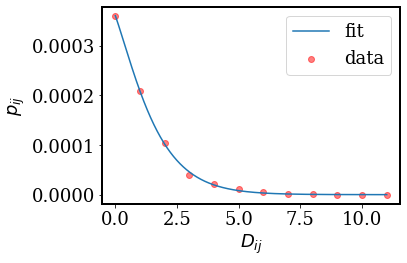

<ipython-input-1215-259147770570>:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pij_logistic'][df['pij_logistic'] > (a/2)] = 1
<ipython-input-1215-259147770570>:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pij_logistic'][df['pij_logistic'] < (a/2) ] = 0


2.3361381117157594 / 0.0014827743792401227


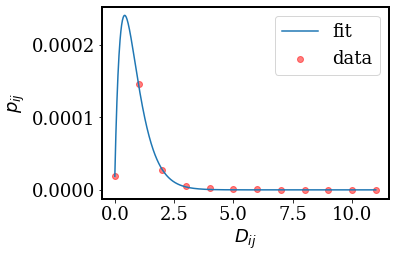

<ipython-input-1215-259147770570>:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pij_logistic'][df['pij_logistic'] > (a/2)] = 1
<ipython-input-1215-259147770570>:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pij_logistic'][df['pij_logistic'] < (a/2) ] = 0


2.3481348756425753 / 0.001403415136773181


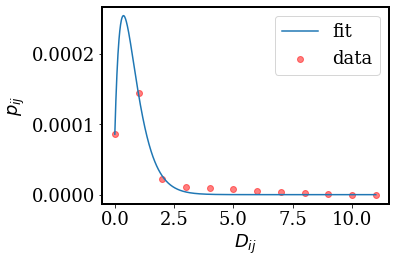

<ipython-input-1215-259147770570>:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pij_logistic'][df['pij_logistic'] > (a/2)] = 1
<ipython-input-1215-259147770570>:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pij_logistic'][df['pij_logistic'] < (a/2) ] = 0


0.3017865208607623 / 1.1473630389988165e-09


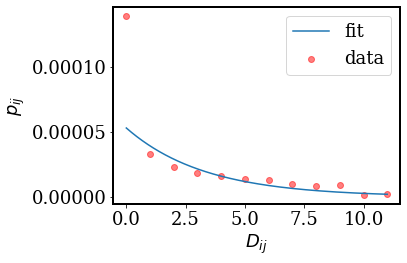

<ipython-input-1215-259147770570>:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pij_logistic'][df['pij_logistic'] > (a/2)] = 1
<ipython-input-1215-259147770570>:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pij_logistic'][df['pij_logistic'] < (a/2) ] = 0


1.0484786150331633 / 0.0002340188995707456


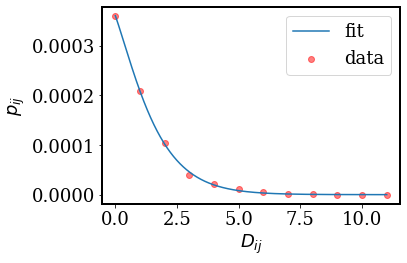

<ipython-input-1215-259147770570>:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pij_logistic'][df['pij_logistic'] > (a/2)] = 1
<ipython-input-1215-259147770570>:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pij_logistic'][df['pij_logistic'] < (a/2) ] = 0


2.3361381117157594 / 0.0014827743792401227


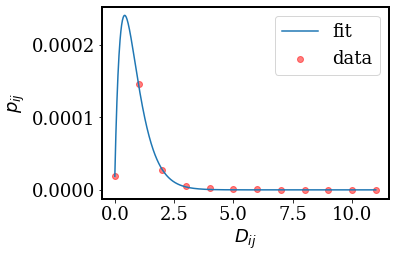

<ipython-input-1215-259147770570>:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pij_logistic'][df['pij_logistic'] > (a/2)] = 1
<ipython-input-1215-259147770570>:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pij_logistic'][df['pij_logistic'] < (a/2) ] = 0


2.3481348756425753 / 0.001403415136773181


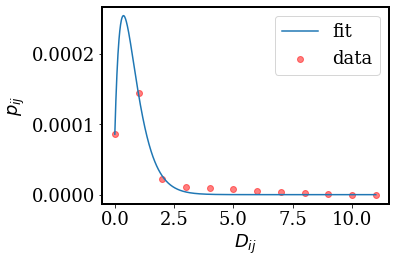

<ipython-input-1215-259147770570>:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pij_logistic'][df['pij_logistic'] > (a/2)] = 1
<ipython-input-1215-259147770570>:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pij_logistic'][df['pij_logistic'] < (a/2) ] = 0


0.3017865208607623 / 1.1473630389988165e-09


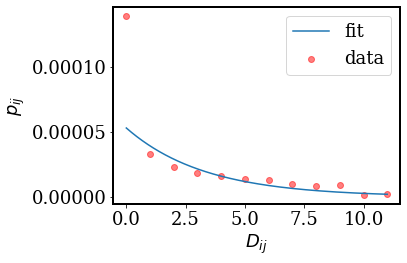

<ipython-input-1215-259147770570>:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pij_logistic'][df['pij_logistic'] > (a/2)] = 1
<ipython-input-1215-259147770570>:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pij_logistic'][df['pij_logistic'] < (a/2) ] = 0


1.0484786150331633 / 0.0002340188995707456


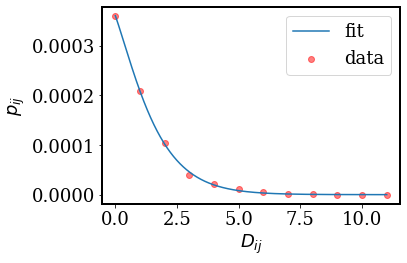

<ipython-input-1215-259147770570>:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pij_logistic'][df['pij_logistic'] > (a/2)] = 1
<ipython-input-1215-259147770570>:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pij_logistic'][df['pij_logistic'] < (a/2) ] = 0


2.3361381117157594 / 0.0014827743792401227


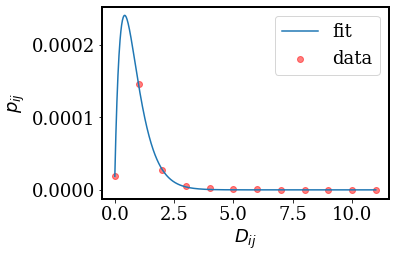

<ipython-input-1215-259147770570>:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pij_logistic'][df['pij_logistic'] > (a/2)] = 1
<ipython-input-1215-259147770570>:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pij_logistic'][df['pij_logistic'] < (a/2) ] = 0


2.3481348756425753 / 0.001403415136773181


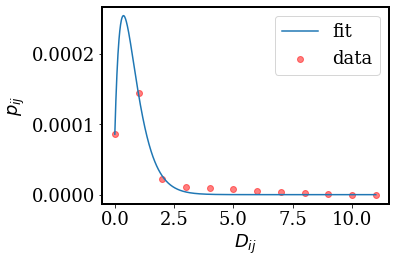

<ipython-input-1215-259147770570>:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pij_logistic'][df['pij_logistic'] > (a/2)] = 1
<ipython-input-1215-259147770570>:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pij_logistic'][df['pij_logistic'] < (a/2) ] = 0


0.3017865208607623 / 1.1473630389988165e-09


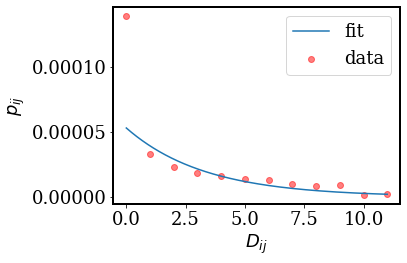

<ipython-input-1215-259147770570>:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pij_logistic'][df['pij_logistic'] > (a/2)] = 1
<ipython-input-1215-259147770570>:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pij_logistic'][df['pij_logistic'] < (a/2) ] = 0


1.0484786150331633 / 0.0002340188995707456


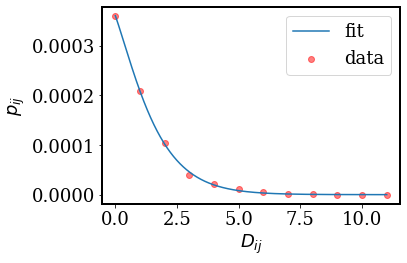

<ipython-input-1215-259147770570>:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pij_logistic'][df['pij_logistic'] > (a/2)] = 1
<ipython-input-1215-259147770570>:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pij_logistic'][df['pij_logistic'] < (a/2) ] = 0


2.3361381117157594 / 0.0014827743792401227


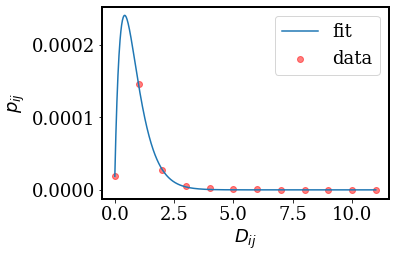

<ipython-input-1215-259147770570>:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pij_logistic'][df['pij_logistic'] > (a/2)] = 1
<ipython-input-1215-259147770570>:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pij_logistic'][df['pij_logistic'] < (a/2) ] = 0


2.3481348756425753 / 0.001403415136773181


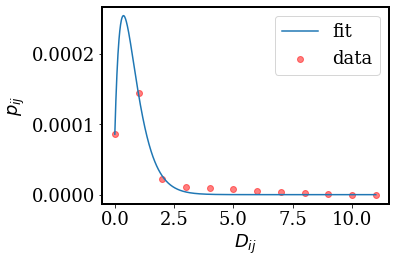

<ipython-input-1215-259147770570>:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pij_logistic'][df['pij_logistic'] > (a/2)] = 1
<ipython-input-1215-259147770570>:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pij_logistic'][df['pij_logistic'] < (a/2) ] = 0


0.3017865208607623 / 1.1473630389988165e-09


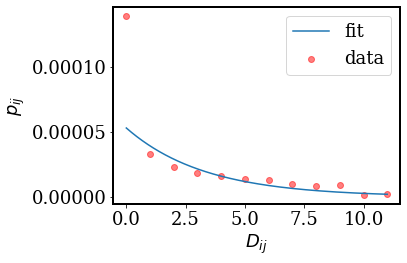

In [1245]:
group = 1


def prob_function(d_ij,alpha, a, beta, b):
#     beta =0.0000014074102356647932
    
#     p_ij =(a)/( 1 + ((b**-1 * d_ij) ** alpha))
#     beta = 0
#     alpha = 1
    p_ij = ( a+ ((beta) * (d_ij))) * np.exp((-alpha ) *d_ij)
    
#     p_ij = ( a+ ((beta) * (d_ij))) * np.exp((-alpha) *d_ij)
    


    return p_ij
layers = 'werkschool', 'huishouden', 'familie', 'buren'

layer_list = []
a_values = []
betas= []
alphas = []
characteristics = []



for j in ['e','g', 'o', 'a']:
    for i in layers:

        layer = i
        df = pd.read_csv(f'../Data/probabilities/pij_dij_Distances_without_overig_m.csv')


        df = df.fillna(0)

        df.replace([np.inf, -np.inf], 0, inplace=True)

        df1 = get_df(df,layer, True, True, j)


        # print(df1)
        a = np.mean(df1[df1['dij'] == 0])['pij']


        a = df1.groupby(by='dij').mean().reset_index()

        idx = a['pij'].idxmax()

        a = a.iloc[idx]['pij']

        translate = {'huishouden': 'Household', 'familie':'Family', 'werkschool':'Work_School', 'buren': 'Neighbours'}


        from scipy.optimize import curve_fit
        df2 = df1.groupby(by='dij').mean().reset_index()

        df1['dij_e']
        # df3 = df1[df1['dij'] != 0]
        ydata =df1['pij']  
        xdata = df1['dij']


        x = np.linspace(0, max(xdata), 1000)
        # plt.scatter(xdata,ydata)
        # print(xdata)

        # print(max(df1['pij']))
        p0 = [0,a,0,0]
        popt, pcov = curve_fit(prob_function, xdata, ydata, maxfev=50000,p0=p0, bounds=((0,0,0,0), (np.inf,np.inf,np.inf,np.inf)))

        alpha, a, beta, b = popt

        layer_list.append(layer)
        a_values.append(a)
        alphas.append(alpha)
        betas.append(beta)
        characteristics.append(j)



        # print(list(df2['dij']).index(max(df2['pij'])))
        plt.scatter(df2['dij'], df2['pij'], alpha=.5, c='r',  label="data" )
        plt.plot(x, prob_function(x, popt[0], popt[1], popt[2], popt[3]), label = 'fit')
        # plt.title(f'{translate[layer]} {group}')
        plt.xlabel('$D_{ij}$')
        plt.ylabel('$p_{ij}$')


        plt.legend()
        alpha, a, beta, b = popt

        # plt.ylim(-0.001,0.001)
        print(alpha,'/',  beta)
        # plt.ylim(0, 0.00025)

        plt.tight_layout()
        # plt.savefig(f'../Figures/Homophily_specific/{translate[layer]}_probability_distance_equation{group}_SRA.PNG')
        plt.show()


        

<ipython-input-1215-259147770570>:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pij_logistic'][df['pij_logistic'] > (a/2)] = 1
<ipython-input-1215-259147770570>:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pij_logistic'][df['pij_logistic'] < (a/2) ] = 0


2.3481348756425753 / 0.001403415136773181


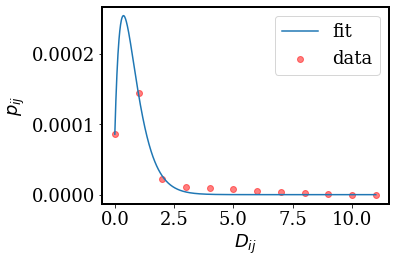

In [1248]:
group = 1


def prob_function(d_ij,alpha, a, beta, b):
#     beta =0.0000014074102356647932
    
#     p_ij =(a)/( 1 + ((b**-1 * d_ij) ** alpha))
#     beta = 0
#     alpha = 1
    p_ij = ( a+ ((beta) * (d_ij))) * np.exp((-alpha ) *d_ij)
    
#     p_ij = ( a+ ((beta) * (d_ij))) * np.exp((-alpha) *d_ij)
    


    return p_ij
layers = 'werkschool', 'huishouden', 'familie', 'buren'

layer_list = []
a_values = []
betas= []
alphas = []
characteristics = []



# for j in ['e','g', 'o', 'a']:
#     for i in layers:

layer = 'familie'
df = pd.read_csv(f'../Data/probabilities/pij_dij_Distances_without_overig_m.csv')


df = df.fillna(0)

df.replace([np.inf, -np.inf], 0, inplace=True)

df1 = get_df(df,layer, True, True)


# print(df1)
a = np.mean(df1[df1['dij'] == 0])['pij']


a = df1.groupby(by='dij').mean().reset_index()

idx = a['pij'].idxmax()

a = a.iloc[idx]['pij']

translate = {'huishouden': 'Household', 'familie':'Family', 'werkschool':'Work_School', 'buren': 'Neighbours'}


from scipy.optimize import curve_fit
df2 = df1.groupby(by='dij').mean().reset_index()

df1['dij_e']
# df3 = df1[df1['dij'] != 0]
ydata =df1['pij']  
xdata = df1['dij']


x = np.linspace(0, max(xdata), 1000)
# plt.scatter(xdata,ydata)
# print(xdata)

# print(max(df1['pij']))
p0 = [0,a,0,0]
popt, pcov = curve_fit(prob_function, xdata, ydata, maxfev=50000,p0=p0, bounds=((0,0,0,0), (np.inf,np.inf,np.inf,np.inf)))

alpha, a, beta, b = popt

layer_list.append(layer)
a_values.append(a)
alphas.append(alpha)
betas.append(beta)
characteristics.append(j)



# print(list(df2['dij']).index(max(df2['pij'])))
plt.scatter(df2['dij'], df2['pij'], alpha=.5, c='r',  label="data" )
plt.plot(x, prob_function(x, popt[0], popt[1], popt[2], popt[3]), label = 'fit')
# plt.title(f'{translate[layer]} {group}')
plt.xlabel('$D_{ij}$')
plt.ylabel('$p_{ij}$')


plt.legend()
alpha, a, beta, b = popt

# plt.ylim(-0.001,0.001)
print(alpha,'/',  beta)
# plt.ylim(0, 0.00025)

plt.tight_layout()
# plt.savefig(f'../Figures/Homophily_specific/{translate[layer]}_probability_distance_equation{group}_SRA.PNG')
plt.show()


        

In [705]:
df2['pij'].iloc[0] - df2['pij'].iloc[-1]

0.0001609281697126936
0.00013760845994083648

4.1792002578202926e-05

In [663]:
df2['pij'].iloc[0] - df2['pij'].iloc[-1]

2.2744159938510137e-05

In [1075]:
y_pred = prob_function(df2['dij'], popt[0], popt[1], popt[2], popt[3])
y_true = df2['pij']
xs = df2['dij']
RegscorePy.bic.bic(y_true, y_pred, 2)

-304.94514292761045

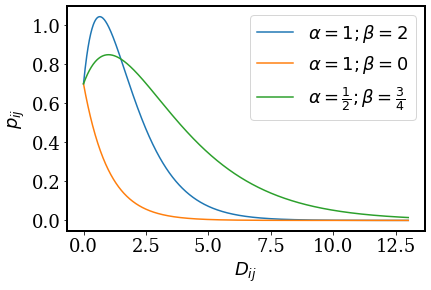

In [939]:

alpha = 1
beta = 2
b = 0
a = 0.7


plt.plot(x, prob_function(x, alpha, a, beta, b), label = r'$\alpha=1;\beta=2$', )


alpha = 1
beta = 0
b = 0
a = 0.7
plt.plot(x, prob_function(x, alpha, a, beta, b), label = r'$\alpha=1;\beta=0$')


alpha = 0.5
beta = 0.7
b = 0
a = 0.7


plt.plot(x, prob_function(x, alpha, a, beta, b), label = r'$\alpha=\frac{1}{2};\beta = \frac{3}{4}$')


# alpha = 0.5
# beta = 0
# b = 0
# a = 0.7
# plt.plot(x, prob_function(x, alpha, a, beta, b), label = r'$\alpha=\frac{1}{2};\beta = 0$')
# plt.scatter(1,1)

plt.legend()
plt.tight_layout()
plt.ylabel('$p_{ij}$')
plt.xlabel('$D_{ij}$')
#
plt.savefig('Example SRA.pdf')

In [1076]:
from sklearn.metrics import r2_score


def press_statistic(y_true, y_pred, xs):
    """
    Calculation of the `Press Statistics <https://www.otexts.org/1580>`_
    """
    res = y_pred - y_true
    hat = xs.dot(np.linalg.pinv(xs))
    den = (1 - np.diagonal(hat))
    sqr = np.square(res/den)
    return sqr.sum()

def predicted_r2(y_true, y_pred, xs):
    """
    Calculation of the `Predicted R-squared <https://rpubs.com/RatherBit/102428>`_
    """
    press = press_statistic(y_true=y_true,
                            y_pred=y_pred,
                            xs=xs
    )

    sst  = np.square( y_true - y_true.mean() ).sum()
    return 1 - press / sst
 
def r2(y_true, y_pred):
    """
    Calculation of the unadjusted r-squared, goodness of fit metric
    """
    sse  = np.square( y_pred - y_true ).sum()
    sst  = np.square( y_true - y_true.mean() ).sum()
    return 1 - sse/sst

print(r2(y_true, y_pred))
r2_score(y_true, y_pred)
# predicted_r2(y_true, y_pred, xs)


0.974841036619626


0.974841036619626

Getting the R squared value and the R squared value of only 0 and comparing both values.

In [39]:

ss_res_0 = np.sum(df2['pij'] - ([0] * len(df2['pij'])))

# residual sum of squares
ss_res = np.sum((df2['pij'] - prob_function(df2['dij'], popt[0], popt[1], popt[2], popt[3])) ** 2)

# total sum of squares
ss_tot = np.sum((ydata - np.mean(ydata)) ** 2)

ss_tot_0 = np.sum((ydata - np.mean(ydata)) ** 2)

# r-squared
r2 = 1 - (ss_res / ss_tot)

r2_0 = 1 - (ss_res_0 / ss_tot_0)




r2

0.9999982256043247

In [43]:

ss_res_0 = np.sum(df2['pij'] - ([0] * len(df2['pij'])))

# residual sum of squares
ss_res = np.sum((df2['pij'] - prob_function(df2['dij'], popt[0], popt[1], popt[2], popt[3])) ** 2)

# total sum of squares
ss_tot = np.sum((ydata - np.mean(ydata)) ** 2)

ss_tot_0 = np.sum((ydata - np.mean(ydata)) ** 2)

# r-squared
r2 = 1 - (ss_res / ss_tot)

r2_0 = 1 - (ss_res_0 / ss_tot_0)




r2

0.9999960249498032

In [30]:
def prob_function2(dist,etn_dist, age_dist, gender_dist, opl_dist):
#     print(dist)
    a,b,c,d = dist
#     print(age_dist, gender_dist, opl_dist, etn_dist)
    # Work/school
    alpha,a,b2 = [2.95464380e+00, 1.43612761e-04, 1.50487064e+00]
    # Family alpha, a, b2 = [1.51901678e+01, 1.95171705e-04, 1.32592328e+00]
    
    # Household
    alpha,a,b2 = [1.04633813e+01, 3.65648417e-05, 1.54797442e+00]
    
    
#     alpha, a, b = [2.60434666e+00, 6.65300420e-05, 9.06747890e-01]
    
#     alpha = 3.74706687e+00
    
    p_ij =a /( 1 + 1/b2*(   age_dist * b + gender_dist * c + opl_dist * d + etn_dist * a ) ** alpha)
    
 
    
    return p_ij

dij
[2.42575118e+04 7.27750835e-02 1.15117137e-01 1.78468640e-01] [[ 3.74164582e+06 -8.76040909e+01 -8.23875863e+01 -8.19633103e+01]
 [-8.76040909e+01  9.65123632e-03 -4.48837225e-04  1.25162040e-03]
 [-8.23875863e+01 -4.48837225e-04  3.61742500e-03  1.53720911e-03]
 [-8.19633103e+01  1.25162040e-03  1.53720911e-03  4.09579460e-03]]
[1.93433343e+03 9.82407060e-02 6.01450331e-02 6.39983953e-02]


<ipython-input-30-d9818aa011da>:17: RuntimeWarning: invalid value encountered in power
  p_ij =a /( 1 + 1/b2*(   age_dist * b + gender_dist * c + opl_dist * d + etn_dist * a ) ** alpha)


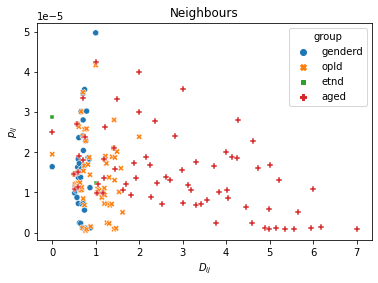

In [31]:
from scipy.optimize import curve_fit
df2 = df1.groupby(by='dij').mean().reset_index()


name = 'familie'

groups = ['_gender_d', '_opl_d', '_etn_d','_age_d']


import re

df = pd.DataFrame()
x_values = []
y_values = []
group = []
for g in groups:
    ydata =df1['pij']  
    data_a =  df1.groupby(by=name+g).mean().reset_index()
    xdata_a = data_a[name+g]
    ydata_a = data_a['pij']
    
    x_values.extend(list(xdata_a))
    y_values.extend(list(ydata_a))
    
    group.extend([re.sub('[^a-zA-Z]+', '', g)] * len(ydata_a))
    
df['dij'] = x_values
df['pij'] = y_values
df['group'] = group




# print(max

print('dij')

p0 = [0,0.00006,0.00001,0.00002]
sn.scatterplot(data = df, x='dij', y='pij', hue = 'group', style = 'group')

plt.title('Neighbours')
plt.xlabel('$D_{ij}$')
plt.ylabel('$p_{ij}$')

# huishouden_gender_d huishouden_age_d huishouden_etn_d huishouden_opl_d
xdata = [df1[name+'_opl_d'] ,  df1[name+'_age_d'],df1[name+'_etn_d'],df1[name+'_gender_d']]

xdata =  df2['dij_a'],df2['dij_g'] ,df2['dij_o'],df2['dij_e']
# print(xdata)
popt, pcov = curve_fit(prob_function2, xdata, df2['pij'], maxfev=5000, bounds=(-np.inf, np.inf))

print(popt,pcov)

perr = np.sqrt(np.diag(pcov))

print(perr)


Feature: 0, Score: -0.69394
Feature: 1, Score: -0.10624
Feature: 2, Score: -0.01842
Feature: 3, Score: -0.18139


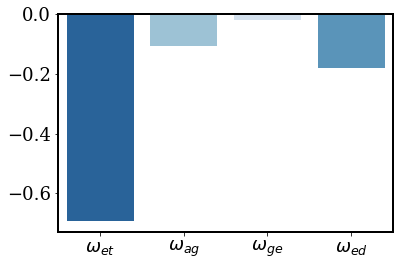

array([4.05681632])

Found existing installation: sklearn 0.0Found existing installation: sklearn 0.0Found existing installation: sklearn 0.0

Uninstalling sklearn-0.0:
Uninstalling sklearn-0.0:

Uninstalling sklearn-0.0:
  Would remove:  Would remove:  Would remove:
    c:\users\kgulp\anaconda3\lib\site-packages\sklearn-0.0.dist-info\*
Proceed (y/n)? 

    c:\users\kgulp\anaconda3\lib\site-packages\sklearn-0.0.dist-info\*

Proceed (y/n)? 
    c:\users\kgulp\anaconda3\lib\site-packages\sklearn-0.0.dist-info\*
Proceed (y/n)? 


In [1434]:
# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# print(df1)
# g = df1.groupby('pij_logistic')
# g = g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True))

# X = g[['dij_e', 'dij_a', 'dij_g', 'dij_o']]
# pij = g['pij_logistic']

# clf = LogisticRegression(penalty='none', solver="newton-cg")

# clf.fit(X, pij)
# # get importance
# importance = clf.coef_[0]
# summarize feature importance

importance = -importance/abs(importance).sum()

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance

pal = sn.color_palette("Blues", len(importance))
rank = abs(importance).argsort().argsort()   # http://stackoverflow.com/a/6266510/1628638
sn.barplot(x = [abs(x) for x in range(len(importance))], y = importance, palette=np.array(pal)[rank])


# pyplot.bar([x for x in range(len(importance))], importance)
# pyplot.title(f'{translate[layer]}, linear regression  {group}')
pyplot.xticks([0,1,2,3],[r'$\omega_{et}$', r'$\omega_{ag}$', r'$\omega_{ge}$', r'$\omega_{ed}$'] )
pyplot.savefig(f'{translate[layer]}_probability_distance_characteristics.pdf')

# pyplot.title('Family, logistic regression')
# pyplot.xticks([0,1,2,3],['$dij_e$', '$dij_a$', '$dij_g$', '$dij_o$'] )
# sn.color_palette('Set2')

pyplot.show()

clf.intercept_

0.457796033360192 1.0000000032124749e-05
0.457796033360192 5.460117492259519e-05 1e-10 1.0000000032124749e-05
Feature: 0, Score: -0.15768
Feature: 1, Score: -0.02414
Feature: 2, Score: -0.00419
Feature: 3, Score: -0.04122


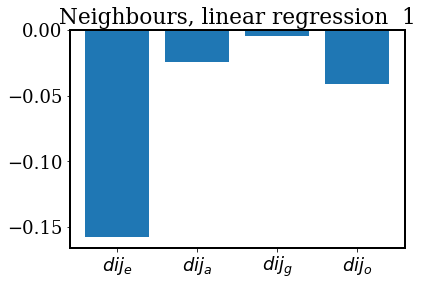

array([-0.15768289, -0.02414017, -0.00418614, -0.04121774])

In [1432]:
df1['pij_transformed'] = ((((df1['pij']/a)**-1) -1)**-alpha) * b


print(alpha,beta)

# df1['pij_transformed'] = - (lambertw(- (alpha*(df1['pij'] - a))/beta))/alpha

f = (alpha * df1['pij']) / (np.exp((a*alpha)/beta) * beta )

# df1['pij_transformed'] = - (lambertw(- (alpha*(df1['pij'] - a))/beta))/alpha

df1['pij_transformed'] = -(lambertw(-f) * beta + (alpha * a))/ (alpha * beta)

# df1[df1['pij_transformed'] == 0 ]

re  = [i.real for i in df1['pij_transformed']]
    

df1['pij_transformed'] = re



# df1 = df1[df1['complex'] == 0]

# print(df1['pij_transformed'])

# df1.iloc[:,8:]

df1
df1 = df1[df1['pij_transformed'] != np.inf]

df1

df1.dropna()



s = pd.Series(df1['pij_transformed'], dtype="Float64")
dtype="Float64"
df1['pij_transformed'] = s - min(s)


from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset



print(alpha, a, b, beta)
pij = df1['pij']
pij = df1['pij_transformed']


X = df1[[ 'dij_e', 'dij_a', 'dij_g', 'dij_o' ]]

reg = LinearRegression().fit(X, pij)

# get importance
importance = reg.coef_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pal = sn.color_palette("Greens_d", len(importance))
rank = abs(importance).argsort().argsort()   # http://stackoverflow.com/a/6266510/1628638
sn.barplot(x = [abs(x) for x in range(len(importance))], y = importance, palette=np.array(pal)[rank])


pyplot.bar([x for x in range(len(importance))], importance)
pyplot.title(f'{translate[layer]}, linear regression  {group}')
pyplot.xticks([0,1,2,3],['$dij_e$', '$dij_a$', '$dij_g$', '$dij_o$'] )
# pyplot.savefig(f'{translate[layer]}_probability_distance_characteristics.pdf')

pyplot.show()


df1

importance

2.3361381117157594 0.0014827743792401227
2.3361381117157594 6.698068616266744e-13 1e-10 0.0014827743792401227
Feature: 0, Score: -0.00713
Feature: 1, Score: -0.00052
Feature: 2, Score: 0.00196
Feature: 3, Score: -0.00029


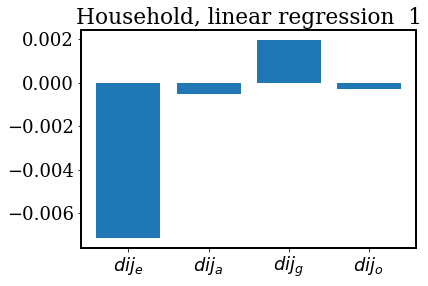

array([-0.0071348 , -0.00052274,  0.00195891, -0.0002866 ])

In [1197]:
df1['pij_transformed'] = ((((df1['pij']/a)**-1) -1)**-alpha) * b


print(alpha,beta)

# df1['pij_transformed'] = - (lambertw(- (alpha*(df1['pij'] - a))/beta))/alpha

f = (alpha * df1['pij']) / (np.exp((a*alpha)/beta) * beta )

# df1['pij_transformed'] = - (lambertw(- (alpha*(df1['pij'] - a))/beta))/alpha

df1['pij_transformed'] = -(lambertw(-f) * beta + (alpha * a))/ (alpha * beta)

# df1[df1['pij_transformed'] == 0 ]

re  = [i.real for i in df1['pij_transformed']]
    

df1['pij_transformed'] = re



# df1 = df1[df1['complex'] == 0]

# print(df1['pij_transformed'])

# df1.iloc[:,8:]

df1
df1 = df1[df1['pij_transformed'] != np.inf]

df1

df1.dropna()



s = pd.Series(df1['pij_transformed'], dtype="Float64")
dtype="Float64"
df1['pij_transformed'] = s - min(s)


from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset



print(alpha, a, b, beta)
pij = df1['pij']
pij = df1['pij_transformed']


X = df1[[ 'dij_e', 'dij_a', 'dij_g', 'dij_o' ]]

reg = LinearRegression().fit(X, pij)

# get importance
importance = reg.coef_

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance

pal = sn.color_palette("Greens_d", len(importance))
rank = abs(importance).argsort().argsort()   # http://stackoverflow.com/a/6266510/1628638
sn.barplot(x = [abs(x) for x in range(len(importance))], y = importance, palette=np.array(pal)[rank])


pyplot.bar([x for x in range(len(importance))], importance)
pyplot.title(f'{translate[layer]}, linear regression  {group}')
pyplot.xticks([0,1,2,3],['$dij_e$', '$dij_a$', '$dij_g$', '$dij_o$'] )
# pyplot.savefig(f'{translate[layer]}_probability_distance_characteristics.pdf')

pyplot.show()


df1

importance

In [437]:
reg.coef_

array([-0.03446831, -0.00113575,  0.00117572, -0.0020574 ])

In [38]:
df['dij']

0        0.000000
1        1.000000
2        2.000000
3        1.414214
4        1.732051
           ...   
36859    1.732051
36860    1.414214
36861    2.000000
36862    1.000000
36863    0.000000
Name: dij, Length: 36864, dtype: float64

-0.034468313449291965


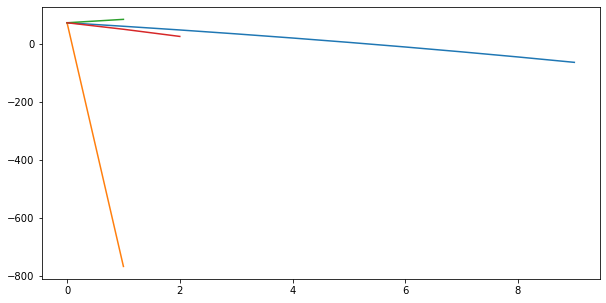

In [438]:
#### df1[[ 'dij_e', 'dij_a', 'dij_g', 'dij_o' ]]

df1['e'] = df1['dij_e'] * reg.coef_[0]
df1['a'] = df1['dij_a'] * reg.coef_[1]
df1['g'] = df1['dij_g'] * reg.coef_[2]
df1['o'] = df1['dij_o'] * reg.coef_[3]

S = df1[['e', 'a', 'g', 'o']]

[0.5] * len(df1['o'])

list(S.sum(axis=1))


x = range(0,8, 1)

print(reg.coef_[0])
prob_function(df['dij'],alpha, a, beta, b).sum()/36863 * 861000
[prob_function((reg.coef_[0] ) ,alpha, a, beta, b) * 861000 , prob_function((reg.coef_[2] ),alpha, a, beta, b) * 861000]

y = [prob_function((reg.coef_[0]*10 *i),alpha, a, beta, b) * 861000 for i in range(2)]
y1 = [prob_function((reg.coef_[1]*10 *i),alpha, a, beta, b)* 861000 for i in range(10)]
y2 = [prob_function((reg.coef_[2]*10 *i),alpha, a, beta, b)* 861000 for i in range(2)]
y3 = [prob_function((reg.coef_[3]*10 *i),alpha, a, beta, b)* 861000 for i in range(3)]

plt.plot(y1)
plt.plot(y)
plt.plot(y2)
plt.plot(y3)

# ([prob_function(1 + (-reg.coef_[i] *100),alpha, a, beta, b)* 861000 for i in range(4)]), prob_function(1,alpha, a, beta, b) * 861000

In [439]:
w

1.3655956047158844


In [408]:
prob_function(0,alpha, a, beta, b)*861000

16.129635922823557

In [303]:
df2 = df1.groupby(by='dij').mean().reset_index()

print(beta)

0.001


In [455]:
importance = importance/sum(importance)*4
print(importance)
prob_function2(0, 0, 0 , 0, importance, alpha, a, beta, reg.intercept_)* 861000

[ 3.77882496  0.12451418 -0.12889621  0.22555707]
2.3466987403041273 8.576256824533823e-05 0.0014010678612579475


69.83444913556828

In [446]:
def prob_function2(dije, dija, dijg, dijo, importance, alpha, a, beta, intercept):

  
    X1, X2, X3, X4 = np.array(importance)
    
    
    print( alpha, a, beta)
#     print(X1, X2, X3, X4)
    p_ij = ( a+ (beta * (X1 * dije  + X3 * dijg + X2 * dija + X4* dijo + intercept))) * np.exp(- alpha * (X1 * dije  + X3 * dijg + X2 * dija + X4 * dijo + intercept))
 
    
    return p_ij

In [321]:
popt, pcov = curve_fit(prob_function2, (df1[ 'dij_e'], df1['dij_a'], df1['dij_g'], df1['dij_o']), ydata, maxfev=50000)

TypeError: iteration over a 0-d array

In [229]:
popt

array([  3.48584456,   1.82199219,   3.57062423, -21.29532043])

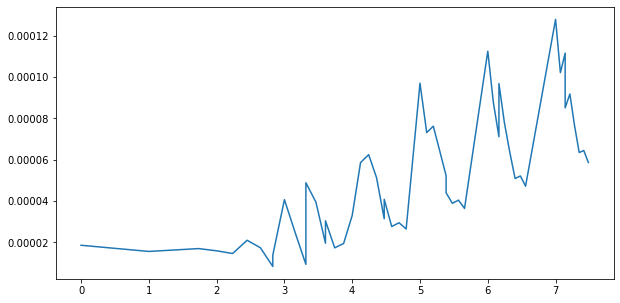

In [249]:
plt.plot(df2['dij'],prob_function2((df2[ 'dij_e'], df2['dij_a'], df2['dij_g'], df2['dij_o']), -6.54
                                   748562e-04, -9.54770635e-05,  4.49522917e-04, -2.62148867e-04))

In [377]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
# X = g[[ 'dij_e', 'dij_a', 'dij_g', 'dij_o' ]]
# pij = g['pij_logistic']

# print(df1.size)
train = df1.head(int(0.66 * df1.size))
test = df1.tail(int(0.33 * df1.size))


g = train.groupby('pij_logistic')
g = g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True))

X_train = train[[ 'dij_e', 'dij_a', 'dij_g', 'dij_o' ]]
y_train = train['pij_logistic']

clf = LogisticRegression(penalty='none', solver="newton-cg")
# clf = RandomForestClassifier()


X_test = test[[ 'dij_e', 'dij_a', 'dij_g', 'dij_o' ]]
y_test = test['pij_logistic']


clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print(tn, fn, tp, fp)
# print(y_pred)

# list(y_pred).count(1)

0.9922916666666667
[[57156     0]
 [  444     0]]
57156 444 0 0


Text(0.5, 0, '$p_{ij}$')

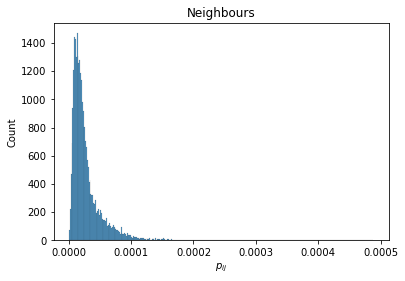

In [797]:
sn.histplot(df1['pij'])
plt.title('Neighbours')
# plt.xlabel('$D_{ij}$')
plt.xlabel('$p_{ij}$')

In [295]:
l = [
3097117      
,2640717 
,940588
,958249
,406772
]

i = 0
a = 0
for x in l:
    i += 1
    print(x/sum(l) * (861000/i))
    
    a += x/sum(l) * (861000/i)
    
print(a)

331526.9017260395
141336.07567058038
33561.34381756668
25643.63261478946
8708.47700418838
540776.4308331644


In [343]:
an_array = np.array([[0, 1],[2, 3]])

print(an_array)

# Output

# [[0 1]
#  [2 3]]


row_to_append = np.array([4, 5])

an_extended_array = np.append(an_array, row_to_append, 0)

print(an_extended_array)

[[0 1]
 [2 3]]


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

In [1393]:
df_new

,layer,alpha,beta,beta/alpha,character,a
0,buren,0.852309,3.859254e-07,4.528001e-07,e,0.000029
1,buren,0.091134,2.337007e-13,2.564368e-12,g,0.000016
2,buren,0.437681,3.820004e-06,8.727834e-06,o,0.000020
3,buren,0.167445,5.536856e-13,3.306670e-12,a,0.000023


In [1394]:
ethnicities = []
genders = []
educations = []
ages = []
l_outcome = []

for et_i in range(2):
    for ge_i in range(2):
        for ed_i in range(3):
            for ag_i in range(7):
                
           
                et = prob_function(et_i,df_new['alpha'].iloc[0], df_new['a'].iloc[0], df_new['beta'].iloc[0],0)
                ge = prob_function(ge_i,df_new['alpha'].iloc[1], df_new['a'].iloc[1], df_new['beta'].iloc[1],0)
                ed = prob_function(ed_i,df_new['alpha'].iloc[2], df_new['a'].iloc[2], df_new['beta'].iloc[2],0)
                ag = prob_function(ag_i,df_new['alpha'].iloc[3], df_new['a'].iloc[3], df_new['beta'].iloc[3],0)
                
#                 et,ge,ed,ag = prob_function(i,df_new['alpha'], df_new['a'], df_new['beta'],0)
    
                ethnicities.append(et)
                genders.append(ge)
                educations.append(ed)
                ages.append(ag)
    
                l_outcome.append(prob_function(et_i+ge_i+ed_i+ag_i,alpha, a, beta,0))

In [1395]:
df_s = pd.DataFrame()

In [1396]:
df_s['gender'] = genders
df_s['ethnicity'] = ethnicities
df_s['ages'] = ages
df_s['educaion'] = educations

df_s['y'] = l_outcome

In [1206]:
df_s['gender'] = df_s['gender'] * abs(importance[2])
df_s['ethnicity'] = df_s['ethnicity'] * abs(importance[0])
df_s['ages'] = df_s['ages'] * abs(importance[1])
df_s['educaion'] = df_s['educaion']* abs(importance[3])

In [1397]:
df_s

,gender,ethnicity,ages,educaion,y
0,0.000016,0.000029,0.000023,0.000020,1.873285e-05
1,0.000016,0.000029,0.000020,0.000020,1.451963e-04
2,0.000016,0.000029,0.000017,0.000020,2.790590e-05
3,0.000016,0.000029,0.000014,0.000020,4.039296e-06
4,0.000016,0.000029,0.000012,0.000020,5.202559e-07
...,...,...,...,...,...
79,0.000015,0.000012,0.000017,0.000011,7.289680e-09
80,0.000015,0.000012,0.000014,0.000011,8.221536e-10
81,0.000015,0.000012,0.000012,0.000011,9.083960e-11
82,0.000015,0.000012,0.000010,0.000011,9.880519e-12


Feature: 0, Score: 6.14564
Feature: 1, Score: 0.53741
Feature: 2, Score: 2.99227
Feature: 3, Score: 2.37195


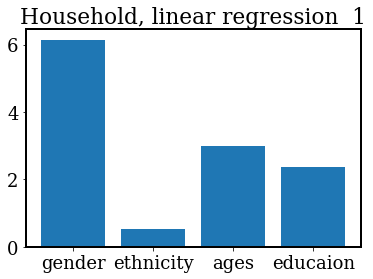

In [1399]:

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset



# print(alpha, a, b, beta)
# pij = df1['pij']
# pij = df1['pij_transformed']


X = df_s[[ 'gender', 'ethnicity','ages','educaion' ]]

reg = LinearRegression().fit(X, df_s['y'])

# get importance
importance = reg.coef_

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance

pal = sn.color_palette("Greens_d", len(importance))
rank = abs(importance).argsort().argsort()   # http://stackoverflow.com/a/6266510/1628638
sn.barplot(x = [abs(x) for x in range(len(importance))], y = importance, palette=np.array(pal)[rank])


pyplot.bar([x for x in range(len(importance))], importance)
pyplot.title(f'{translate[layer]}, linear regression  {group}')
pyplot.xticks([0,1,2,3],['gender', 'ethnicity','ages','educaion'] )
pyplot.savefig(f'{translate[layer]}_probability_distance_characteristics.pdf')

pyplot.show()

In [1382]:
reg.intercept_

-6.494370446146598e-06

<ipython-input-1260-fc6634f7fb06>:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pij_logistic'][df['pij_logistic'] > (a/2)] = 1
<ipython-input-1260-fc6634f7fb06>:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pij_logistic'][df['pij_logistic'] < (a/2) ] = 0


0.8523085241748836 / 3.8592540488524463e-07


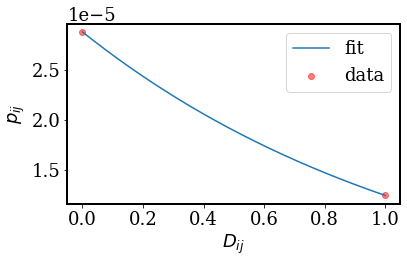

<ipython-input-1260-fc6634f7fb06>:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pij_logistic'][df['pij_logistic'] > (a/2)] = 1
<ipython-input-1260-fc6634f7fb06>:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pij_logistic'][df['pij_logistic'] < (a/2) ] = 0


0.0911338401329028 / 2.3370067381425814e-13


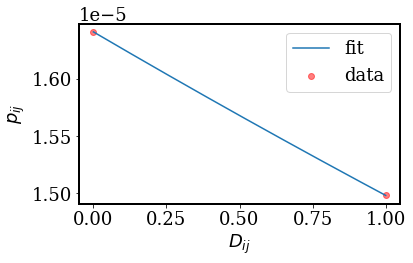

<ipython-input-1260-fc6634f7fb06>:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pij_logistic'][df['pij_logistic'] > (a/2)] = 1
<ipython-input-1260-fc6634f7fb06>:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pij_logistic'][df['pij_logistic'] < (a/2) ] = 0


0.4376806665508966 / 3.820004019760481e-06


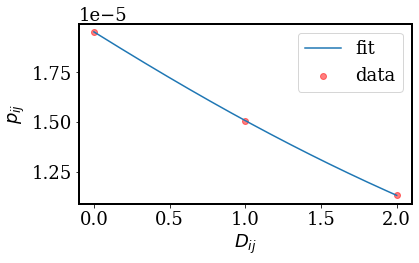

<ipython-input-1260-fc6634f7fb06>:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pij_logistic'][df['pij_logistic'] > (a/2)] = 1
<ipython-input-1260-fc6634f7fb06>:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pij_logistic'][df['pij_logistic'] < (a/2) ] = 0


0.16744507654827492 / 5.536855936695061e-13


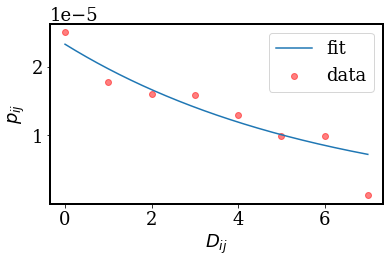

In [1391]:
group = 1


def prob_function(d_ij,alpha, a, beta, b):
#     beta =0.0000014074102356647932
    
#     p_ij =(a)/( 1 + ((b**-1 * d_ij) ** alpha))
#     beta = 0
#     alpha = 1
    p_ij = ( a+ ((beta) * (d_ij))) * np.exp((-alpha ) *d_ij)
    
#     p_ij = ( a+ ((beta) * (d_ij))) * np.exp((-alpha) *d_ij)
    


    return p_ij
layers = 'werkschool', 'huishouden', 'familie', 'buren'

layer_list = []
a_values = []
betas= []
alphas = []
characteristics = []



for j in ['e','g', 'o', 'a']:


    layer = 'buren'
    df = pd.read_csv(f'../Data/probabilities/pij_dij_Distances_without_overig_m.csv')


    df = df.fillna(0)

    df.replace([np.inf, -np.inf], 0, inplace=True)

    df1 = get_df(df,layer, True, True, j)


    # print(df1)
    a = np.mean(df1[df1['dij'] == 0])['pij']


    a = df1.groupby(by='dij').mean().reset_index()

    idx = a['pij'].idxmax()

    a = a.iloc[idx]['pij']

    translate = {'huishouden': 'Household', 'familie':'Family', 'werkschool':'Work_School', 'buren': 'Neighbours'}


    from scipy.optimize import curve_fit
    df2 = df1.groupby(by='dij').mean().reset_index()

    df1['dij_e']
    # df3 = df1[df1['dij'] != 0]
    ydata =df1['pij']  
    xdata = df1['dij']


    x = np.linspace(0, max(xdata), 1000)
    # plt.scatter(xdata,ydata)
    # print(xdata)

    # print(max(df1['pij']))
    p0 = [0,a,0,0]
    popt, pcov = curve_fit(prob_function, xdata, ydata, maxfev=50000,p0=p0, bounds=((0,0,0,0), (np.inf,np.inf,np.inf,np.inf)))

    alpha, a, beta, b = popt

    layer_list.append(layer)
    a_values.append(a)
    alphas.append(alpha)
    betas.append(beta)
    characteristics.append(j)



    # print(list(df2['dij']).index(max(df2['pij'])))
    plt.scatter(df2['dij'], df2['pij'], alpha=.5, c='r',  label="data" )
    plt.plot(x, prob_function(x, popt[0], popt[1], popt[2], popt[3]), label = 'fit')
    # plt.title(f'{translate[layer]} {group}')
    plt.xlabel('$D_{ij}$')
    plt.ylabel('$p_{ij}$')


    plt.legend()
    alpha, a, beta, b = popt

    # plt.ylim(-0.001,0.001)
    print(alpha,'/',  beta)
    # plt.ylim(0, 0.00025)

    plt.tight_layout()
    # plt.savefig(f'../Figures/Homophily_specific/{translate[layer]}_probability_distance_equation{group}_SRA.PNG')
    plt.show()

df_new = pd.DataFrame()
df_new['layer'] = layer_list
df_new['alpha'] = alphas
df_new['beta'] = betas
df_new['beta/alpha'] = (df_new['beta']/df_new['alpha'])
df_new['character'] = characteristics
df_new['a'] = a_values



        

<ipython-input-1260-fc6634f7fb06>:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pij_logistic'][df['pij_logistic'] > (a/2)] = 1
<ipython-input-1260-fc6634f7fb06>:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pij_logistic'][df['pij_logistic'] < (a/2) ] = 0


0.457796033360192 / 1.0000000032124749e-05


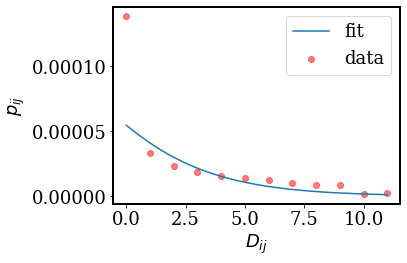

In [1431]:
group = 1


def prob_function(d_ij,alpha, a, beta, b):
#     beta =0.0000014074102356647932
    
#     p_ij =(a)/( 1 + ((b**-1 * d_ij) ** alpha))
#     beta = 0
#     alpha = 1
    p_ij = ( a+ ((beta) * (d_ij))) * np.exp((-alpha ) *d_ij)
    
#     p_ij = ( a+ ((beta) * (d_ij))) * np.exp((-alpha) *d_ij)
    


    return p_ij
layers = 'werkschool', 'huishouden', 'familie', 'buren'

layer_list = []
a_values = []
betas= []
alphas = []
characteristics = []



# for j in ['e','g', 'o', 'a']:
#     for i in layers:

layer = 'buren'
df = pd.read_csv(f'../Data/probabilities/pij_dij_Distances_without_overig_m.csv')


df = df.fillna(0)

df.replace([np.inf, -np.inf], 0, inplace=True)

df1 = get_df(df,layer, True, True)


# print(df1)
a = np.mean(df1[df1['dij'] == 0])['pij']


a = df1.groupby(by='dij').mean().reset_index()

idx = a['pij'].idxmax()

a = a.iloc[idx]['pij']

translate = {'huishouden': 'Household', 'familie':'Family', 'werkschool':'Work_School', 'buren': 'Neighbours'}


from scipy.optimize import curve_fit
df2 = df1.groupby(by='dij').mean().reset_index()

df1['dij_e']
# df3 = df1[df1['dij'] != 0]
ydata =df1['pij']  
xdata = df1['dij']


x = np.linspace(0, max(xdata), 1000)
# plt.scatter(xdata,ydata)
# print(xdata)

# print(max(df1['pij']))
p0 = [0,a,1e-2,0]
popt, pcov = curve_fit(prob_function, xdata, ydata, maxfev=50000,p0=p0, bounds=((0,0,1e-5,0), (np.inf,np.inf,np.inf,np.inf)))

alpha, a, beta, b = popt

layer_list.append(layer)
a_values.append(a)
alphas.append(alpha)
betas.append(beta)
characteristics.append(j)



# print(list(df2['dij']).index(max(df2['pij'])))
plt.scatter(df2['dij'], df2['pij'], alpha=.5, c='r',  label="data" )
plt.plot(x, prob_function(x, popt[0], popt[1], popt[2], popt[3]), label = 'fit')
# plt.title(f'{translate[layer]} {group}')
plt.xlabel('$D_{ij}$')
plt.ylabel('$p_{ij}$')


plt.legend()
alpha, a, beta, b = popt

# plt.ylim(-0.001,0.001)
print(alpha,'/',  beta)
# plt.ylim(0, 0.00025)

plt.tight_layout()
# plt.savefig(f'../Figures/Homophily_specific/{translate[layer]}_probability_distance_equation{group}_SRA.PNG')
plt.show()


        